In [3]:
import math

import matplotlib.pyplot as plt
import scipy.optimize as sopt
import numpy as np
import pandas as pd

In [2]:
path_to_data = 'data/adv/TDRK/'

In [3]:
import sympy as sp
x, τ, u, u_s, A, ω, α, β, x_lab = sp.symbols("x, τ, u, u_s, A, ω, α, β, x_lab")
sp.init_printing()

In [2]:
%texify

UsageError: Line magic function `%texify` not found.


<img src="skoltech_logo.jpg" style="display: block; position: absolute; top: 25px; right: 0;  width: 15%;" />
<img src="mephi_logo.png" style="display: block; position: absolute; top: -25px; left: 0; width: 15%;" />

<img src="logo.jpg" style="float: left; display: block; width: 18%; padding: 5px;" />


# Численное моделирование регуляризации колебаний детонационных волн
---
*Белолуцкий Фёдор Алексеевич, студент НИЯУ МИФИ, исследователь ИАП РАН*


*Научный руководитель: Касимов Аслан Рамазанович, Ph.D., доцент Сколтеха*

<!--<style>*{text-align: justify;}</style>-->

## Реактивное уравнение Бюргерса



Для случая неоднородных граничных условий в СО детонационной волны *(Касимов и Гончар, 2020)*:

$$ \forall x \leqslant 0 \quad \forall t > 0 \quad 
\boxed{\partial_{t}u\left(x,t\right)+\partial_{x}F\left[u\left(x,t\right),u\left(x=x_{s},t\right)\right]=S_{\text{KFR}}\left[x;u\left(x=x_{s},t\right)\right]},
$$
где поток имеет вид $ \frac{1}{2}\left(u\left(x,t\right)\right)^2 - D_s u\left(x,t\right) $,

источниковый член определяется функцией (с параметрами $ \alpha \geqslant 0 $, $ \beta > 0 $, $ k > 0 $)

$$ \left(x,t\right) \stackrel{S_\text{KFR}[\dots]}{\mapsto} \frac{q}{2} \cdot \frac{1}{\sqrt{2\pi}\sqrt{2\beta}}\exp\left(-\frac{1}{2}\cdot\frac{\left(x-\xi_{s}\left[u\left(x_{s},t\right)\right]\right)^{2}}{\left(\sqrt{2\beta}\right)^{2}}\right), $$

$$\qquad t\mapsto\xi_{s}\left[u\left(x_{s},t\right)\right]\stackrel{\text{def}}{:=}t\mapsto-k\left(\frac{u_{0}\left(x_{s}\right)}{u\left(x_{s},t\right)}\right)^{\alpha}.$$

Скорость распространения детонационной волны: $ D_s \equiv \frac{dx_s}{dt} = \frac{1}{2}\left(u\left(x_s, t\right)+u\left(x_a, t\right)\right). $

А стационарное решение $ u_0 $: <!-- x\stackrel{}{\mapsto}\frac{u_{0}\left(x_{s}\right)+u_{0}\left(x_{a}\right)}{2} -->
$$ u_{0}\stackrel{\text{def}}{:=} D_s + \sqrt{2\int_{-\infty}^{x}S_{\text{KFR}}\left[y,u_{0}\left(x_{s}\right)\right]dy} $$

$$ u_{0}\left(x_{s}\right)=u_{0}\left(x_{a}\right)+2\sqrt{2\int_{-\infty}^{0}S_{\text{KFR}}\left[y,u_{0}\left(x_{s}\right)\right]dy} $$

<figure style="text-align: center;"><img style="text-align: center; margin: 0 auto;" src="profile_sketch.svg" alt="Wave in a non-uniform medium solution profile sketch"/>
    <figcaption style="text-align: center; margin: 0 auto; ">Рис. 1: Схема решения для случая неоднородной гармонически меняющейся среды перед детонационной волной</figcaption>
</figure>

## Слабо нелинейная детонация в невязком пределе и попытки её упрощённого описания

<p style="text-align: justify;">Интерес представляют более ранние попытки Уилдона Фикетта и Эндрю Майды получить простую модель, описывающую одномерные детонации, и последующие попытки Р. Розалеса и Э. Майды вывести подобное уравнение, но уже не просто некоторым феноменологическим *ad hoc* путём, а асимптотическим приближением к уравнениям Эйлера в слабо нелинейном пределе (1983).</p>
$$ \partial_t u + \frac{1}{2} \partial_x \left[ u^2 +q\lambda \right] =  0,\; \partial_t \lambda = \omega \left(\lambda, u\right) \qquad \rightarrow \qquad \partial_\tau u + \frac{1}{2} \partial_\xi u^2 = q \partial_\xi \lambda,\; \partial_\xi \lambda = \omega \left(\lambda, u\right) $$

<div style="text-align: center; margin: 0 auto;">Разделение масштабов в слабо нелинейном пределе</div>
<div style="text-align: center; margin: 0 auto;">(поток до ударной волны почти звуковой в сравнении с ней)</div>

## Обезразмеренная версия реактивного уравнения Бюргерса

Обозначим: $ \nu_s \stackrel{\text{def}}{:=} \left[u_0(0)\right] = (u_0(x_s)-u_0(x_a))$. Перенормировки: $u_* \stackrel{\text{def}}{:=} \frac{u}{\nu_s}$, $L_* \stackrel{\text{def}}{:=} \frac{L}{k}$, $t_* \stackrel{\text{def}}{:=} \frac{t}{k/\nu_s} $.

Введём параметр $A$: $u_{a*} = A u_{0*}\left(x_{s*}\right)$.


Стационарное решение:
$$ u_{0*}(x_*) = \frac{ A }{ 1 - A } + \frac{1}{2} \left( 1 + \sqrt{\frac{1+\text{erf}\frac{x_*+1}{2\sqrt{\beta}}}{1+\text{erf}\frac{1}{2\sqrt{\beta}}}} \right). $$


Источниковый член для реактивного уравнения Бюргерса:
$$ S_{*}\left[x_*, u_{*}\left(x_{s*}, t_*\right)\right] = \left( 4  \sqrt{2\pi} \sqrt{2\beta_*} \left( 1+\text{erf}\left(\frac{1}{\sqrt{4\beta_*}}\right) \right) \right)^{-1} \exp \left({ - \frac{1}{2} \frac{\left( x_* - \xi_{s*} \right)^2}{\left( \sqrt{2\beta_*} \right)^2} }\right). $$

## Методы численного решения гиперболических законов сохранения
<figure><img src="hyper_pde_solution1.png" alt="DOI 10.1007/s10915-013-9787-8"/>
    <figcaption style="text-align: center; margin: 0 auto; ">Рис. 2: позаимствован из <a href="https://link.springer.com/article/10.1007/s10915-013-9787-8">DOI 10.1007/s10915-013-9787-8</a></figcaption>
</figure>

<figure style="text-align: center;"><img style="text-align: center; margin: 0 auto;" src="scheme.svg" alt="Wave in a non-uniform medium solution numerical scheme"/>
    <figcaption style="text-align: center; margin: 0 auto; ">Рис. 3 Схема профиля численного решения для случая неоднородной гармонически меняющейся среды перед детонационной волной</figcaption>
</figure>

Рассмотрим, имеет ли смысл использовать методы с процедурами типа Коши-Ковалевской для решения реактивного уравнения Бюргерса.
$$ \partial_{t}^{2}u\left(x,t\right)+\partial_{t}\partial_{x}F\left[u\left(x,t\right),u\left(x=x_{s},t\right)\right]=\partial_{t}S_{\text{KFR}}\left[x;u\left(x=x_{s},t\right)\right] $$
$$ \partial_{t}^{2}u\left(x,t\right)=-\partial_{t}\partial_{x}F\left[u\left(x,t\right),u\left(x=x_{s},t\right)\right]+\partial_{t}S_{\text{KFR}}\left[x;u\left(x=x_{s},t\right)\right] $$
$$ \partial_{t}^{2}u\left(x,t\right)=L_{h}\left[\partial_{u}F\left[u,u_{s}\right]\right]L_{h}\left[u\right]+L_{h}\left[\partial_{u_{s}}F\left[u_{s},u_{s}\right]\right]L_{h}\left[u_{s}\right]+\partial_{x_{s}}S_{\text{KFR}}\left[x;u\left(x=x_{s},t\right)\right]\frac{dx_{s}}{dt} + O\left(\Delta x^5\right) $$
$$ \partial_{t}^{2}u\left(x,t\right)=L_{h}\left[\partial_{u}F\left[u,u_{s}\right]\right]L_{h}\left[u\right]+L_{h}\left[\partial_{u_{s}}F\left[u_{s},u_{s}\right]\right]L_{h}\left[u_{s}\right]+\partial_{x_{s}}S_{\text{KFR}}\left[x;u\left(x=x_{s},t\right)\right]D_s + O\left(\Delta x^5\right) $$
$$ \partial_{t}^{3}u = ⋯ $$

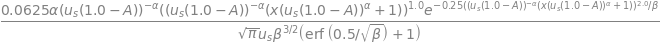

In [32]:
sp.simplify(sp.diff(S, u_s))

## Результаты моделирования динамики детонации с использванием уравнения Бюргерса

## Результаты с WENO5-JS и WENO5-M для уравнений Эйлера
<figure><img style="text-align: center; margin: 0 auto; width:50%;" src="aim_ad_astra.png" />
    <figcaption style="text-align: center; margin: 0 auto; ">Рис. 4: Языки Арнольда, полученные для уравнений Эйлера</figcaption></figure>

## Конечные цели исследования и текущий результат ("нулевое приближение")
<figure style="text-align: center; margin: 0 auto;"><img src="zeroth_approx.png" style="text-align: center; margin: 0 auto; width: 50%;" />
    <figcaption style="text-align: center; margin: 0 auto; ">Рис. 5: 3120 точек в пространстве параметров $(\omega, A)$ гармонических условий среды, подсвеченных по грубо посчитанному числу различных максимумов $u_s$</figcaption></figure>

Бифуркации? Хаос? Аттракторы?

<figure style="text-align: center; margin: 0 auto;"><img src="unstable_detonation_mode_locking.png" style="text-align: center; margin: 0 auto; width: 80%;" />
    <figcaption style="text-align: center; margin: 0 auto; ">Рис. 6: Неустойчивая детонация с $ \alpha=4.5 $, $ \beta=0.1 $, среда перед волной определяется $ A=0.05 $, (a) $ k=0 $, (b) $ k=0.01 $, (c) $ k = 0.1 $</figcaption></figure>

## Градиентная катастрофа и разрывные решения
### Non-oscillatory Problems Require Essentially Non-oscillatory Solutions

In [ ]:
@nb.njit((nbt.float64[:],
          nbt.Array(nbt.int64, 1, 'A', readonly=True),
          nbt.i8, nbt.f8, nbt.optional(nbt.f8),
          nbt.optional(nbt.f8), nbt.i1,))
def weno5_lf(u: npt.NDArray[np.float64],
             int_idx: npt.NDArray[np.int64],
             ishock: np.int64,
             amp: np.float64,
             x_lab: Optional[np.float64],
             wn: Optional[np.float64],
             sign: np.int8) -> npt.NDArray[np.float64]:
    """FD Weighted essentially non-oscillatory 5-th order method (WENO-5)
    to calculate and return the intercell fluxes at right cell edges
    using the Lax-Friedrichs (LF) numerical flux splitting function.

    int_idx = Nint represents the indices of the internal points.
    Return the flux at the right cell edge: flux = F_{j+1/2}
    u = [f(j-2) f(j-1) f(j) f(j+1) f(j+2) f(j+3)]'.
    Shifted by -1, this flux gives the flux at i = 3+1/2,
    which is the first cell boundary ahead of the shock position, i=3.
    Stencil (3 substencils): [j-2, j-1, j+0, j+1, j+2, ...] for '+'
	                (or [j+3, j+2, j+1, j+0, j-1, ...]      for '-').
                    "Специальный интерполятор"
    """

    eps = 1e-40  # meant to avoid divison by zero

    u_s = u[ishock]

    # Maximum magnitude of the flux derivative F_u = (u - D)
    # with respect to the corresponding conserved quantity u
    alpha = np.absolute(u - Dshock(u_s, amp, x_lab, wn, sign)).max()
    f_minus = 0.5 * (reactive_burgers_flux(u, u_s, amp, x_lab, wn, sign)
                     - alpha * u)
    f_plus = 0.5 * (reactive_burgers_flux(u, u_s, amp, x_lab, wn, sign)
                    + alpha * u)

    flux = np.zeros_like(u)

    # promised shift by -1
    shifted_index_range = range(int_idx[0] - 1, int_idx[-1] + 1)
    # at all internal-cell edges, 3:N+3
    for j in shifted_index_range:
        u_minus = np.array([f_minus[j-2], f_minus[j-1], f_minus[j],
                            f_minus[j+1], f_minus[j+2], f_minus[j+3]],
                           dtype=np.float64)
        u_plus = np.array([f_plus[j-2], f_plus[j-1], f_plus[j],
                           f_plus[j+1], f_plus[j+2], f_plus[j+3]],
                          dtype=np.float64)

        # smoothness indicators of the stensil
        # (measure how smooth u is in the stensil)
        ISminus = np.array([
            np.dot(np.dot(u_minus, kfr.weno_matrices.WmAm0), u_minus),
            np.dot(np.dot(u_minus, kfr.weno_matrices.WmAm1), u_minus),
            np.dot(np.dot(u_minus, kfr.weno_matrices.WmAm2), u_minus)
        ])

        ISplus = np.array([
            np.dot(np.dot(u_plus, kfr.weno_matrices.WmAp0), u_plus),
            np.dot(np.dot(u_plus, kfr.weno_matrices.WmAp1), u_plus),
            np.dot(np.dot(u_plus, kfr.weno_matrices.WmAp2), u_plus)
        ])

        # the weights (with d_lin_weights being
        # the linear weights yielding (2*3-1)=5th order accuracy)
        d_lin_weights = 0.1 * np.array([1, 6, 3], dtype=np.float64)
        alphaplus = d_lin_weights / (eps + ISplus) ** 2.
        alphaminus = d_lin_weights / (eps + ISminus) ** 2.

        omegaplus = alphaplus / alphaplus.sum()
        omegaminus = alphaminus / alphaminus.sum()

        fhatplus = np.dot(omegaplus,
                          np.dot(kfr.weno_matrices.WmNplus, u_plus))
        fhatminus = np.dot(omegaminus,
                           np.dot(kfr.weno_matrices.WmNminus, u_minus))

        flux[j] = fhatplus + fhatminus

    return flux

## О MOL-FD-WENO-схемах реконструкции потока с его разбиением

<p style="text-align: justify;">"Несмотря на обширную литературу по данному направлению, вопрос расширения порядка аппроксимации схем и выбора нелинейных весов для сохранения высокого порядка аппроксимации на немонотонных участках решений является открытым."<p>

-Н. М. Евстигнеев, 2016

Также мало изучен вопрос условия Куранта и совместной сходимости WENO5 с разными методами интегрирования по времени. Этим вопросом часто пренебрегают.



<figure style="text-align: center;"><img style="text-align: center; margin: 0 auto;" src="weno5.png" alt="WENO5 schematic analysis"/>
    <figcaption style="text-align: center; margin: 0 auto; ">Рис. 6: Схема WENO5 метода реконструкции (см. <span style="font-style: italic;">Хонг и др., 2020</span>)</figcaption>
</figure>

Идея конечно-разностной WENO-реконструкции состоит в подборе интерполяционного полинома высокого порядка, аппроксимирующего функцию *численного потока* $h$, такую, что в ячейке
$$ \left.\frac{df}{dx}\right|_{x=x_j} = \frac{h_{j+1/2} - h_{j-1/2}}{\Delta x}. $$
Таким образом, h определяется из уравнения
$$ f(x) = \intop_{x-\Delta x/2}^{x+\Delta x/2}h\left( \xi \right) d\xi. $$
Отсюда легко видеть, что 
$$ \left.\frac{du}{dt}\right|_{x=x_j} = - \frac{h_{j+1/2} - h_{j-1/2}}{\Delta x}. $$

Итак, $ \hat{f} \approx h $ и
$$ \left.\frac{du}{dt}\right|_{x=x_j} \approx - \frac{\hat{f}_{j+1/2} - \hat{f}_{j-1/2}}{\Delta x}. $$

$$ \hat{f}_{j+1/2}=\begin{cases}
\mathscr{F}\left[f_{j-(r-1)},\dots,f_{j-1},f_{j},f_{j+1},\dots,f_{j+(r-1)}\right] & \text{для }\rightarrow\text{ волн}\\
\mathscr{F}\left[f_{j+(r-1)+1},\dots,f_{j+2},f_{j+1},f_{j},\dots,f_{j-(r-1)+1}\right] & \text{для }\leftarrow\text{ волн}.
\end{cases}$$

$$ \mathscr{F}\left[f_{j-(r-1)},\dots,f_{j+(r-1)}\right] = \sum_{k=0}^{r-1} \omega_k \cdot \hat{f}_k $$

$$ \omega_n = \frac{\alpha_n}{\sum_k\alpha_k}, \text{ где } \alpha_n = \frac{\bar{\omega}^{\text{lin. ideal}}_n}{\left(\varepsilon + \beta_k\right)^p} $$
$$ \beta_m \stackrel{\text{def}}{:=} \sum_{k=0}^{r-1} \Delta x^{2k-1}\intop_{x_{j-1/2}}^{x_{j+1/2}} \left(\frac{d^k \hat{f}_k}{dx^k}\right)^2 dx $$

## WENO-M

$$ g_{\text{HAP}}\colon\omega\mapsto\frac{\omega\left(\bar{\omega}_{k}^{\text{lin. ideal}}+\left(\bar{\omega}_{k}^{\text{lin. ideal}}\right)^{2}-3.\bar{\omega}_{k}^{\text{lin. ideal}}\cdot\omega+\omega^{2}\right)}{\left(\bar{\omega}_{k}^{\text{lin. ideal}}\right)^{2}+\omega\left(1.-2.\bar{\omega}_{k}^{\text{lin. ideal}}\right)},\qquad\substack{k=\overline{0,\left(r-1\right)}\\
\bar{\omega}_{k}^{\text{lin. ideal}}\in\left(0\mathop{..}1\right)
} $$

$$ g_{\text{HAP}}\colon\omega\mapsto\left(\bar{\omega}_{k}^{\text{lin. ideal}}+\frac{\left(\omega-\bar{\omega}_{k}^{\text{lin. ideal}}\right)^{3}}{\left(\omega-\bar{\omega}_{k}^{\text{lin. ideal}}\right)^{2}+\omega\cdot\left(1.-\omega\right)}\right),\qquad\substack{k=\overline{0,\left(r-1\right)}\\
\bar{\omega}_{k}^{\text{lin. ideal}}\in\left(0\mathop{..}1\right)
}
$$

## WENO-FM

$$ \lambda_j \stackrel{\text{def}}{:=} \frac{1/\left(\beta_j+\epsilon\right)^p}{\sum_k\left(\beta_k+\epsilon\right)^p} $$


$$ g_{\text{FM}}\colon\lambda\mapsto\frac{\lambda\left(\bar{\lambda}+\left(\bar{\lambda}\right)^{2}-3.\bar{\lambda}\cdot\lambda+\lambda^{2}\right)}{\left(\bar{\lambda}\right)^{2}+\lambda\left(1.-2.\bar{\lambda}\right)},\qquad \bar{\lambda}\stackrel{\text{def}}{:=}\frac{1}{r}\in\left(0\mathop{..}1\right) $$

## WENO-S
*Ву и др., 2021*
$$ \delta_S \left[f\right] = x \mapsto \left(f\left(x+h/2\right)-f\left(x-h/2\right)\right) $$
$$ \sigma_S \left[f\right] = x \mapsto \left(f\left(x+h/2\right)+f\left(x-h/2\right)\right) $$
$$ a = \left.\left[\sigma_S^2 \delta_S^{r-3} f\right]\right|_{x=x_c}, \quad
    b = \left.\left[\sigma_S \delta_S^{r-2} f\right]\right|_{x=x_c}, \quad
    c = \left.\left[\delta_S^{r-1} f\right]\right|_{x=x_c} $$
$$ \beta_S\left[f\right] = b^2 + \left|ac\right| $$
$$ \left(\alpha_S\right) = \bar{\omega}^{\text{lin. ideal}} \left( 1 + \left(\frac{\tau_{2r-1(S)}}{\beta^S+\varepsilon}\right) \right) $$
$$ \tau_{2r-1(S)} = \beta_S \left[\delta^{r-1}f\right] \text{ в }x_c=x_j $$
$$ a, b, c = \sum_{подшаблон} \gamma_{r,l} f_k $$
<figure style="text-align: center; margin: 0 auto;"><img style="text-align: center; margin: 0 auto;" src="weno_s.png" />
    <figcaption style="text-align: center; margin: 0 auto;">Рис. 7: Коэффициенты $\gamma_{r,l}$ для WENO11-S</figcaption></figure>

<div style="text-align: center;">
    <h1> Спасибо за внимание! </h1>
    <h2> Ответы на вопросы </h2>
</div>
<div style="text-align: center;"><img src="tumbleweed.jpg"></div>

 ### Контакты
 
* E-mail: fedor1113-public@yandex.com
* Element (бывший Riot.im): fedor1113
* Я также есть на *ResearchGate*.